# 설명 가능한 CNN
## 특성 맵 시각화

In [2]:
# 라이브러리 호출
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [3]:
# 모델 생성
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(input_shape=(100,100,3), 
                           activation='relu', kernel_size=(5,5), filters=32),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(activation='relu', kernel_size=(5,5), filters=64),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(activation='relu', kernel_size=(5,5), filters=64),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(activation='relu', kernel_size=(5,5), filters=64),
   tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),                          # 1차원으로 변경
    tf.keras.layers.Dense(128, activation='relu'),      
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 96, 96, 32)        2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 44, 44, 64)        51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 22, 22, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 18, 18, 64)        102464    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 9, 9, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 5, 5, 64)          1

In [4]:
# 특성맵 정의
ins = model.inputs                  # 100,100,3 형태
outs = model.layers[0].output       # 첫째 레이어의 출력 => 96,96,32 형태
feature_map = Model(inputs=ins, outputs=outs)
feature_map.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_input (InputLayer)    [(None, 100, 100, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 96, 96, 32)        2432      
Total params: 2,432
Trainable params: 2,432
Non-trainable params: 0
_________________________________________________________________


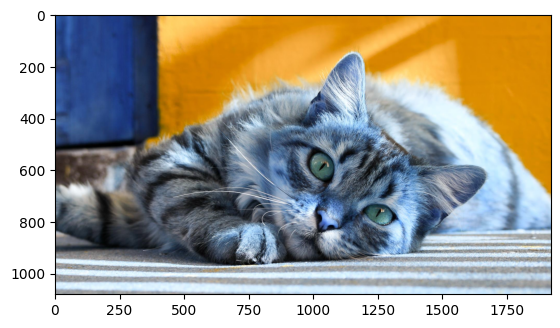

In [6]:
# 이미지 호출
img = cv2.imread("C:/AI/cat.jpg")
plt.imshow(img)
plt.show()

(1, 100, 100, 3)
(1, 96, 96, 32)


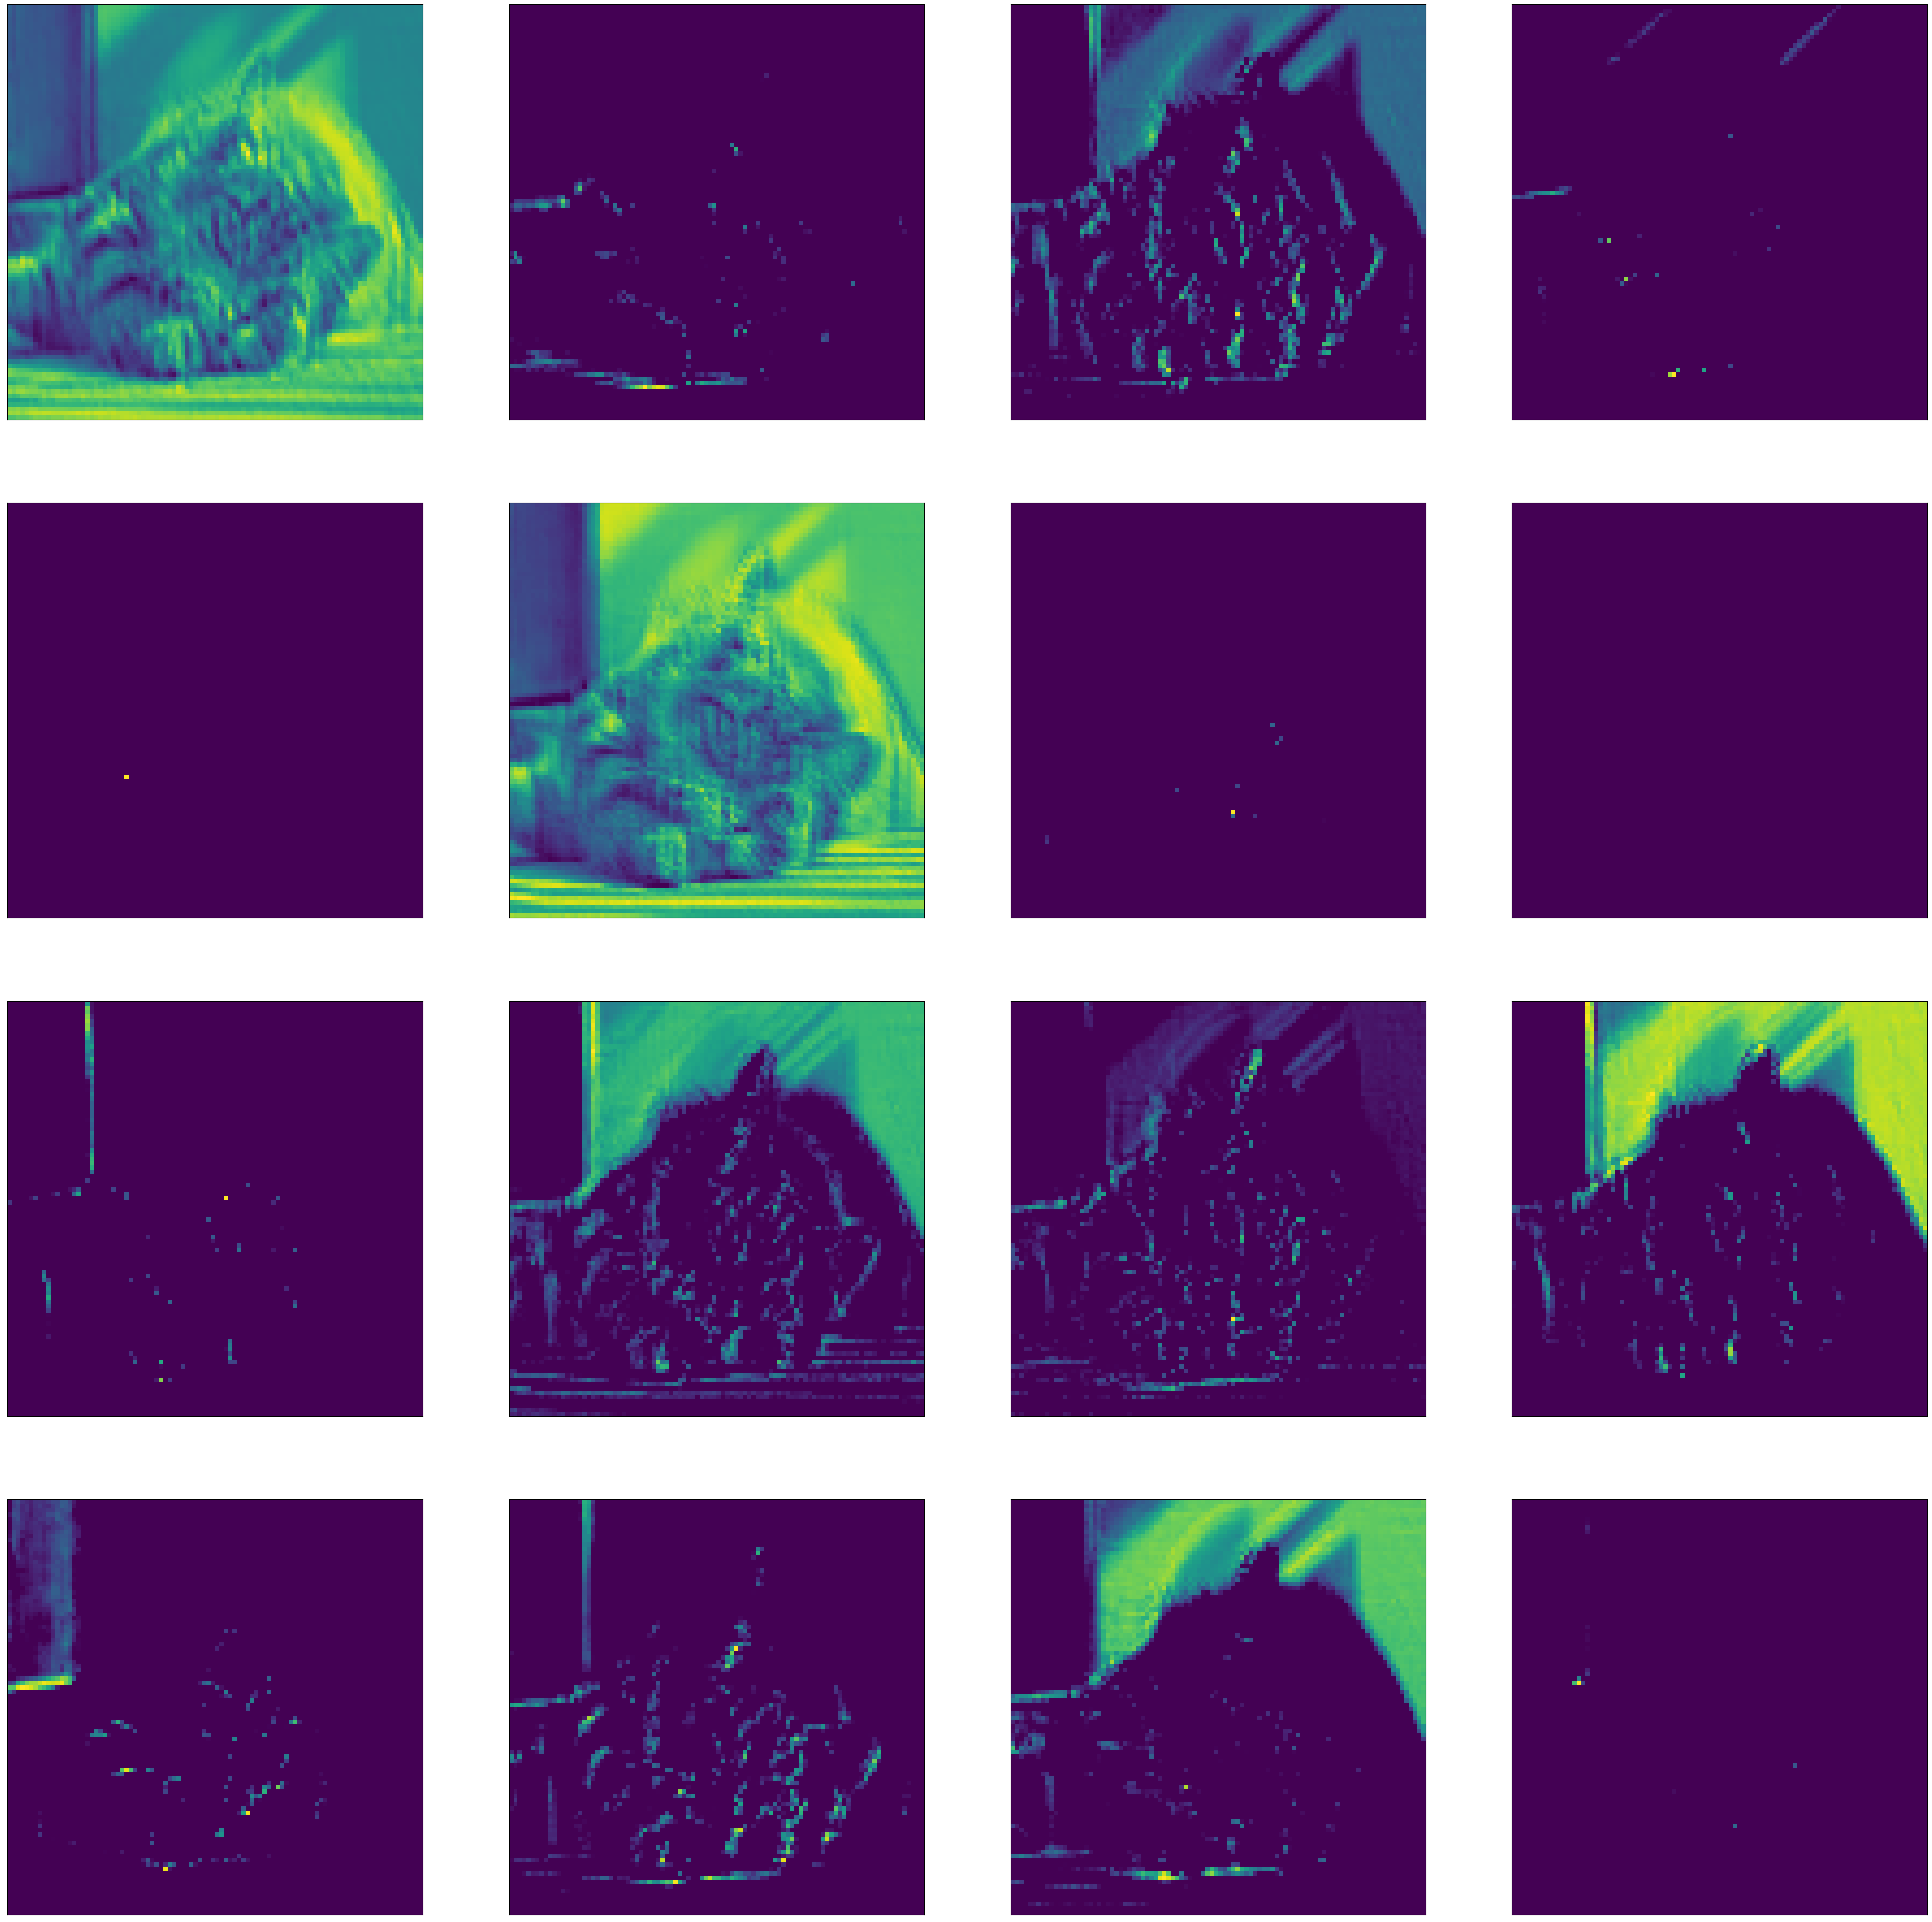

In [17]:
# 이미지 전처리 및 특성 맵 확인
img = cv2.resize(img, (100,100))           # 이미지 크기 조정
input_img = np.expand_dims(img, axis=0)    # 차원 확장 (CNN 입력 4차원)
print(input_img.shape)

feature = feature_map.predict(input_img)   # 학습되지 않은 신경망을 이용하여 예측
print(feature.shape)

plt.figure(figsize=(50,50))
for i in range(16) :
    plt.subplot(4,4,i+1)
    plt.imshow(feature[0,:,:,i])
    plt.xticks([])
    plt.yticks([])
    
plt.show()

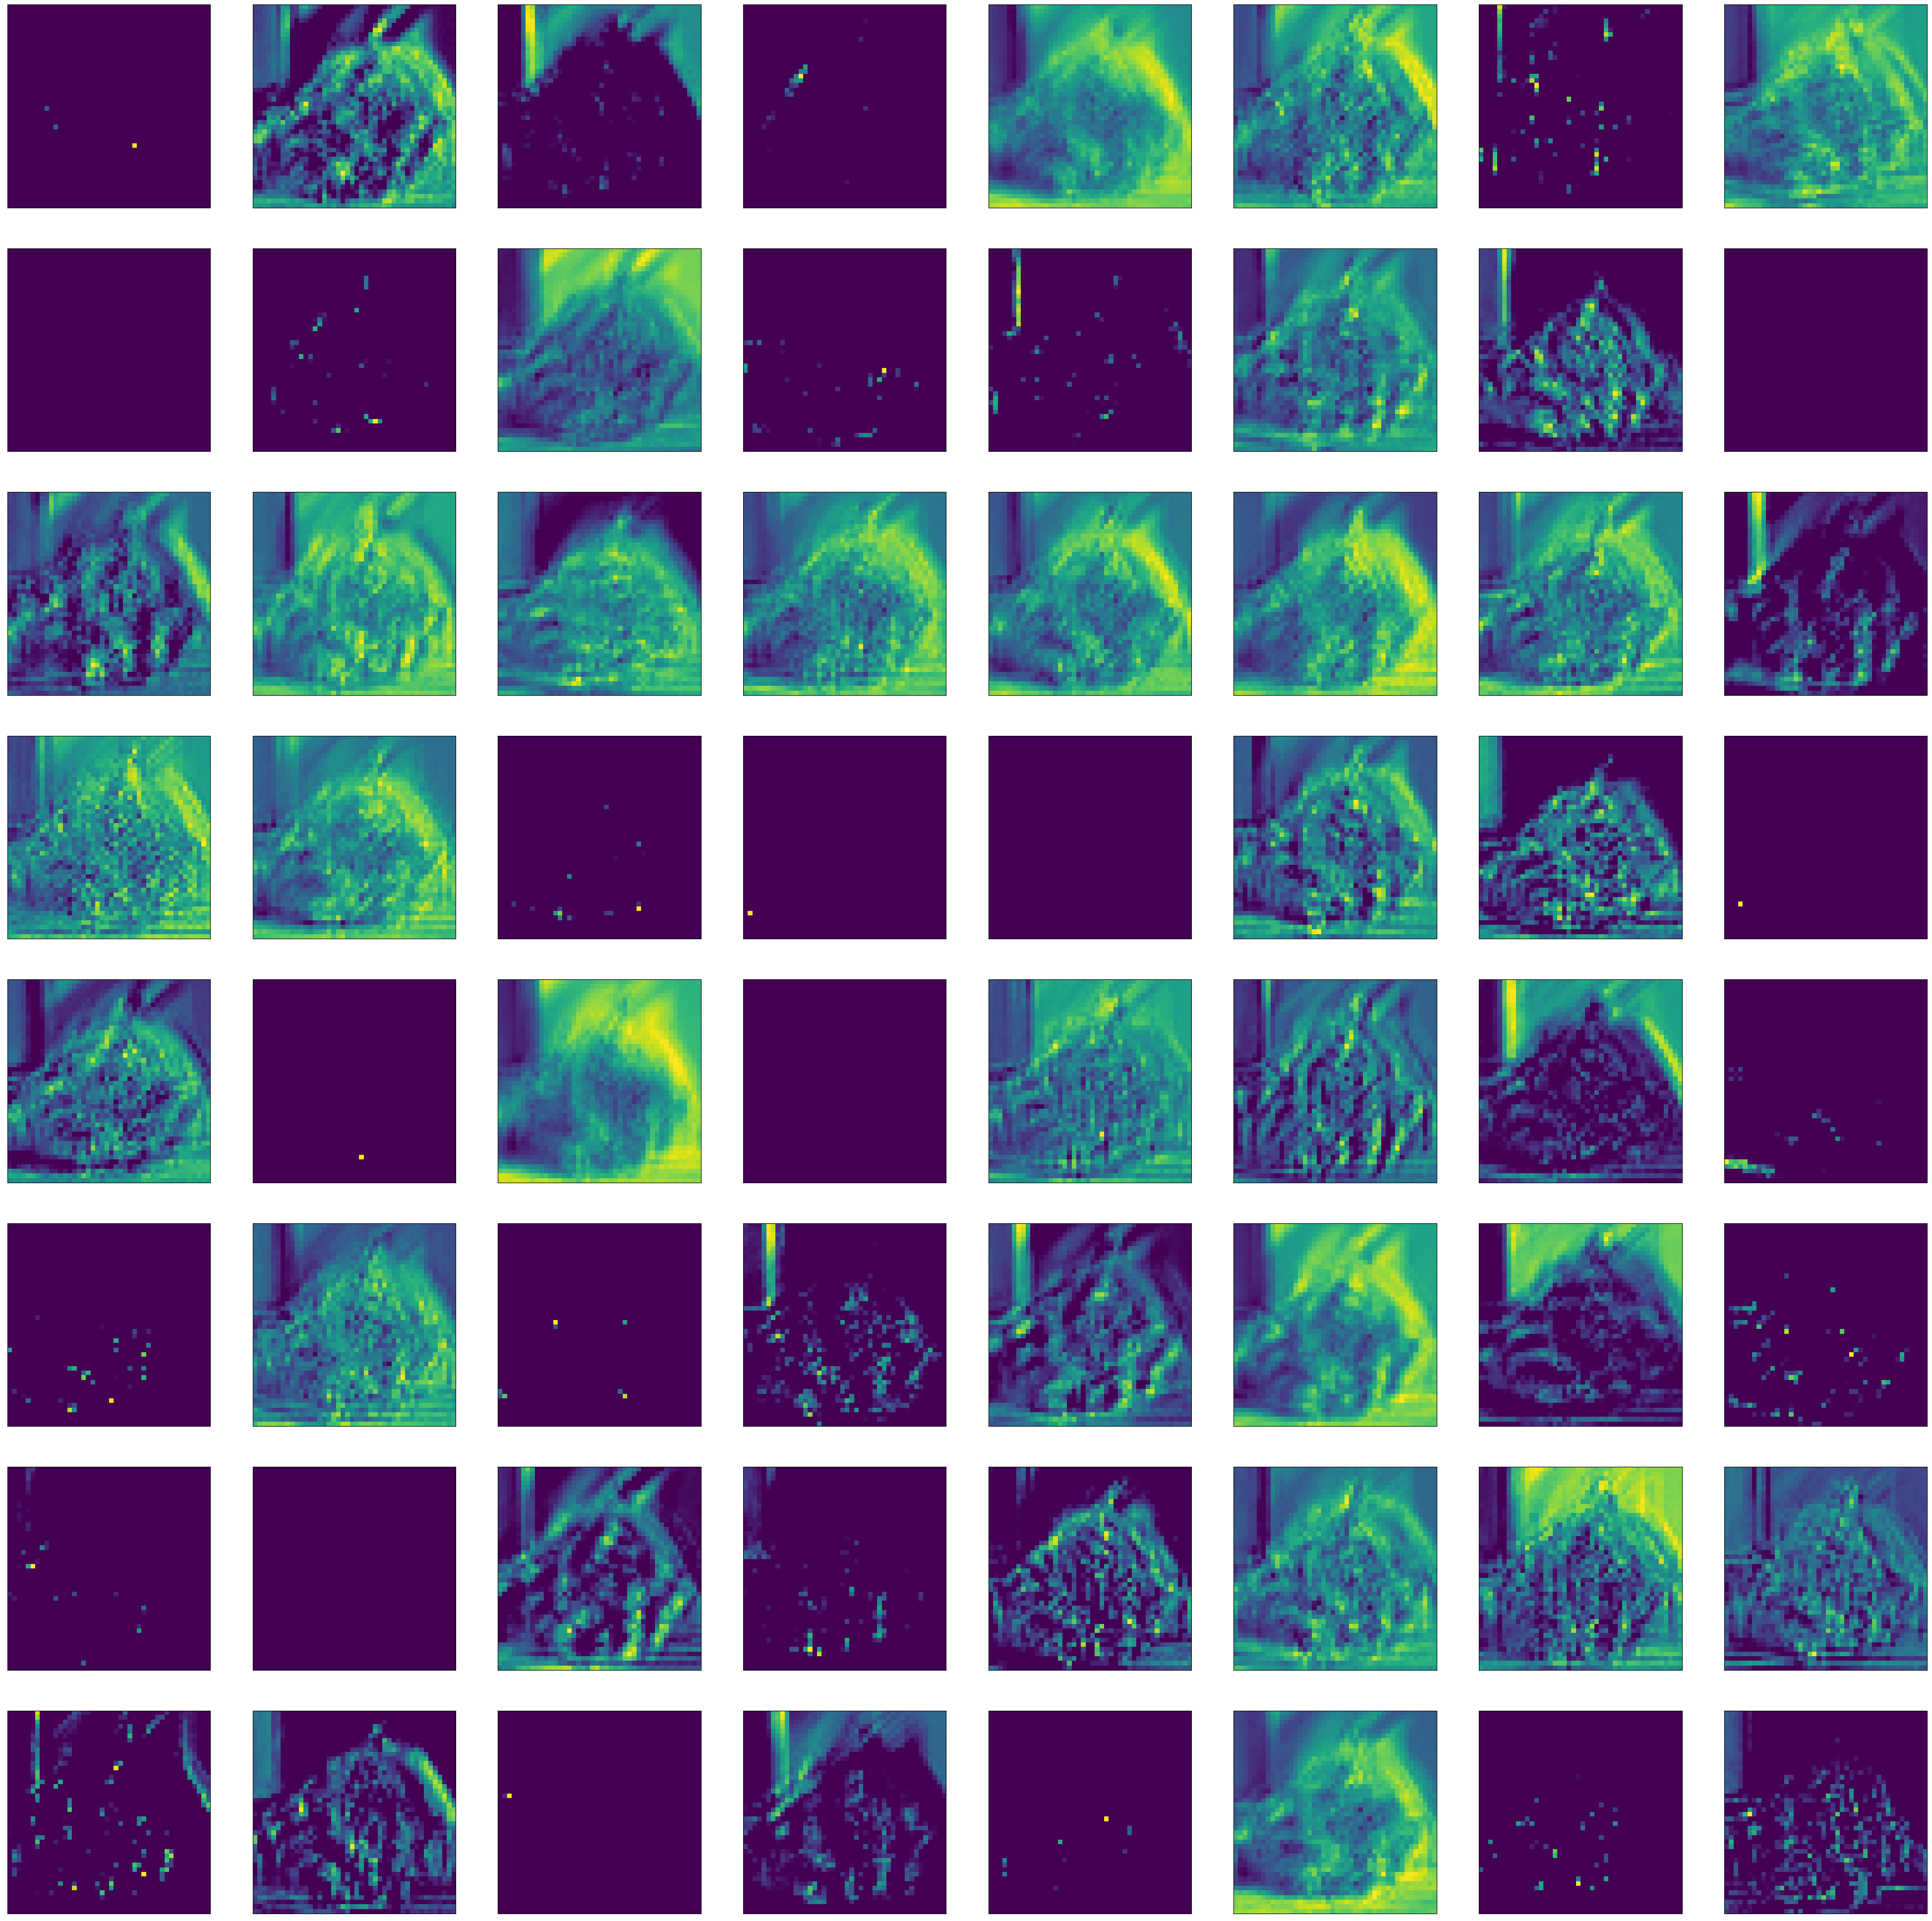

In [21]:
# 두번째 계층에서 특성맵 결과
ins = model.inputs                  # 100,100,3 형태
outs = model.layers[2].output       # 두번째 레이어의 출력 => 96,96,32 형태
feature_map = Model(inputs=ins, outputs=outs)
feature_map.summary()

img = cv2.imread("C:/AI/cat.jpg")
img = cv2.resize(img, (100,100))           # 이미지 크기 조정
input_img = np.expand_dims(img, axis=0)    # 차원 확장 (CNN 입력 4차원)

feature = feature_map.predict(input_img)   # 학습되지 않은 신경망을 이용하여 예측

plt.figure(figsize=(50,50))
for i in range(64) :
    plt.subplot(8,8,i+1)
    plt.imshow(feature[0,:,:,i])
    plt.xticks([])
    plt.yticks([])
    
plt.show()

Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_input (InputLayer)    [(None, 100, 100, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 96, 96, 32)        2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 44, 44, 64)        51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 22, 22, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 18, 18, 64)        102464    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 9, 9, 64)         

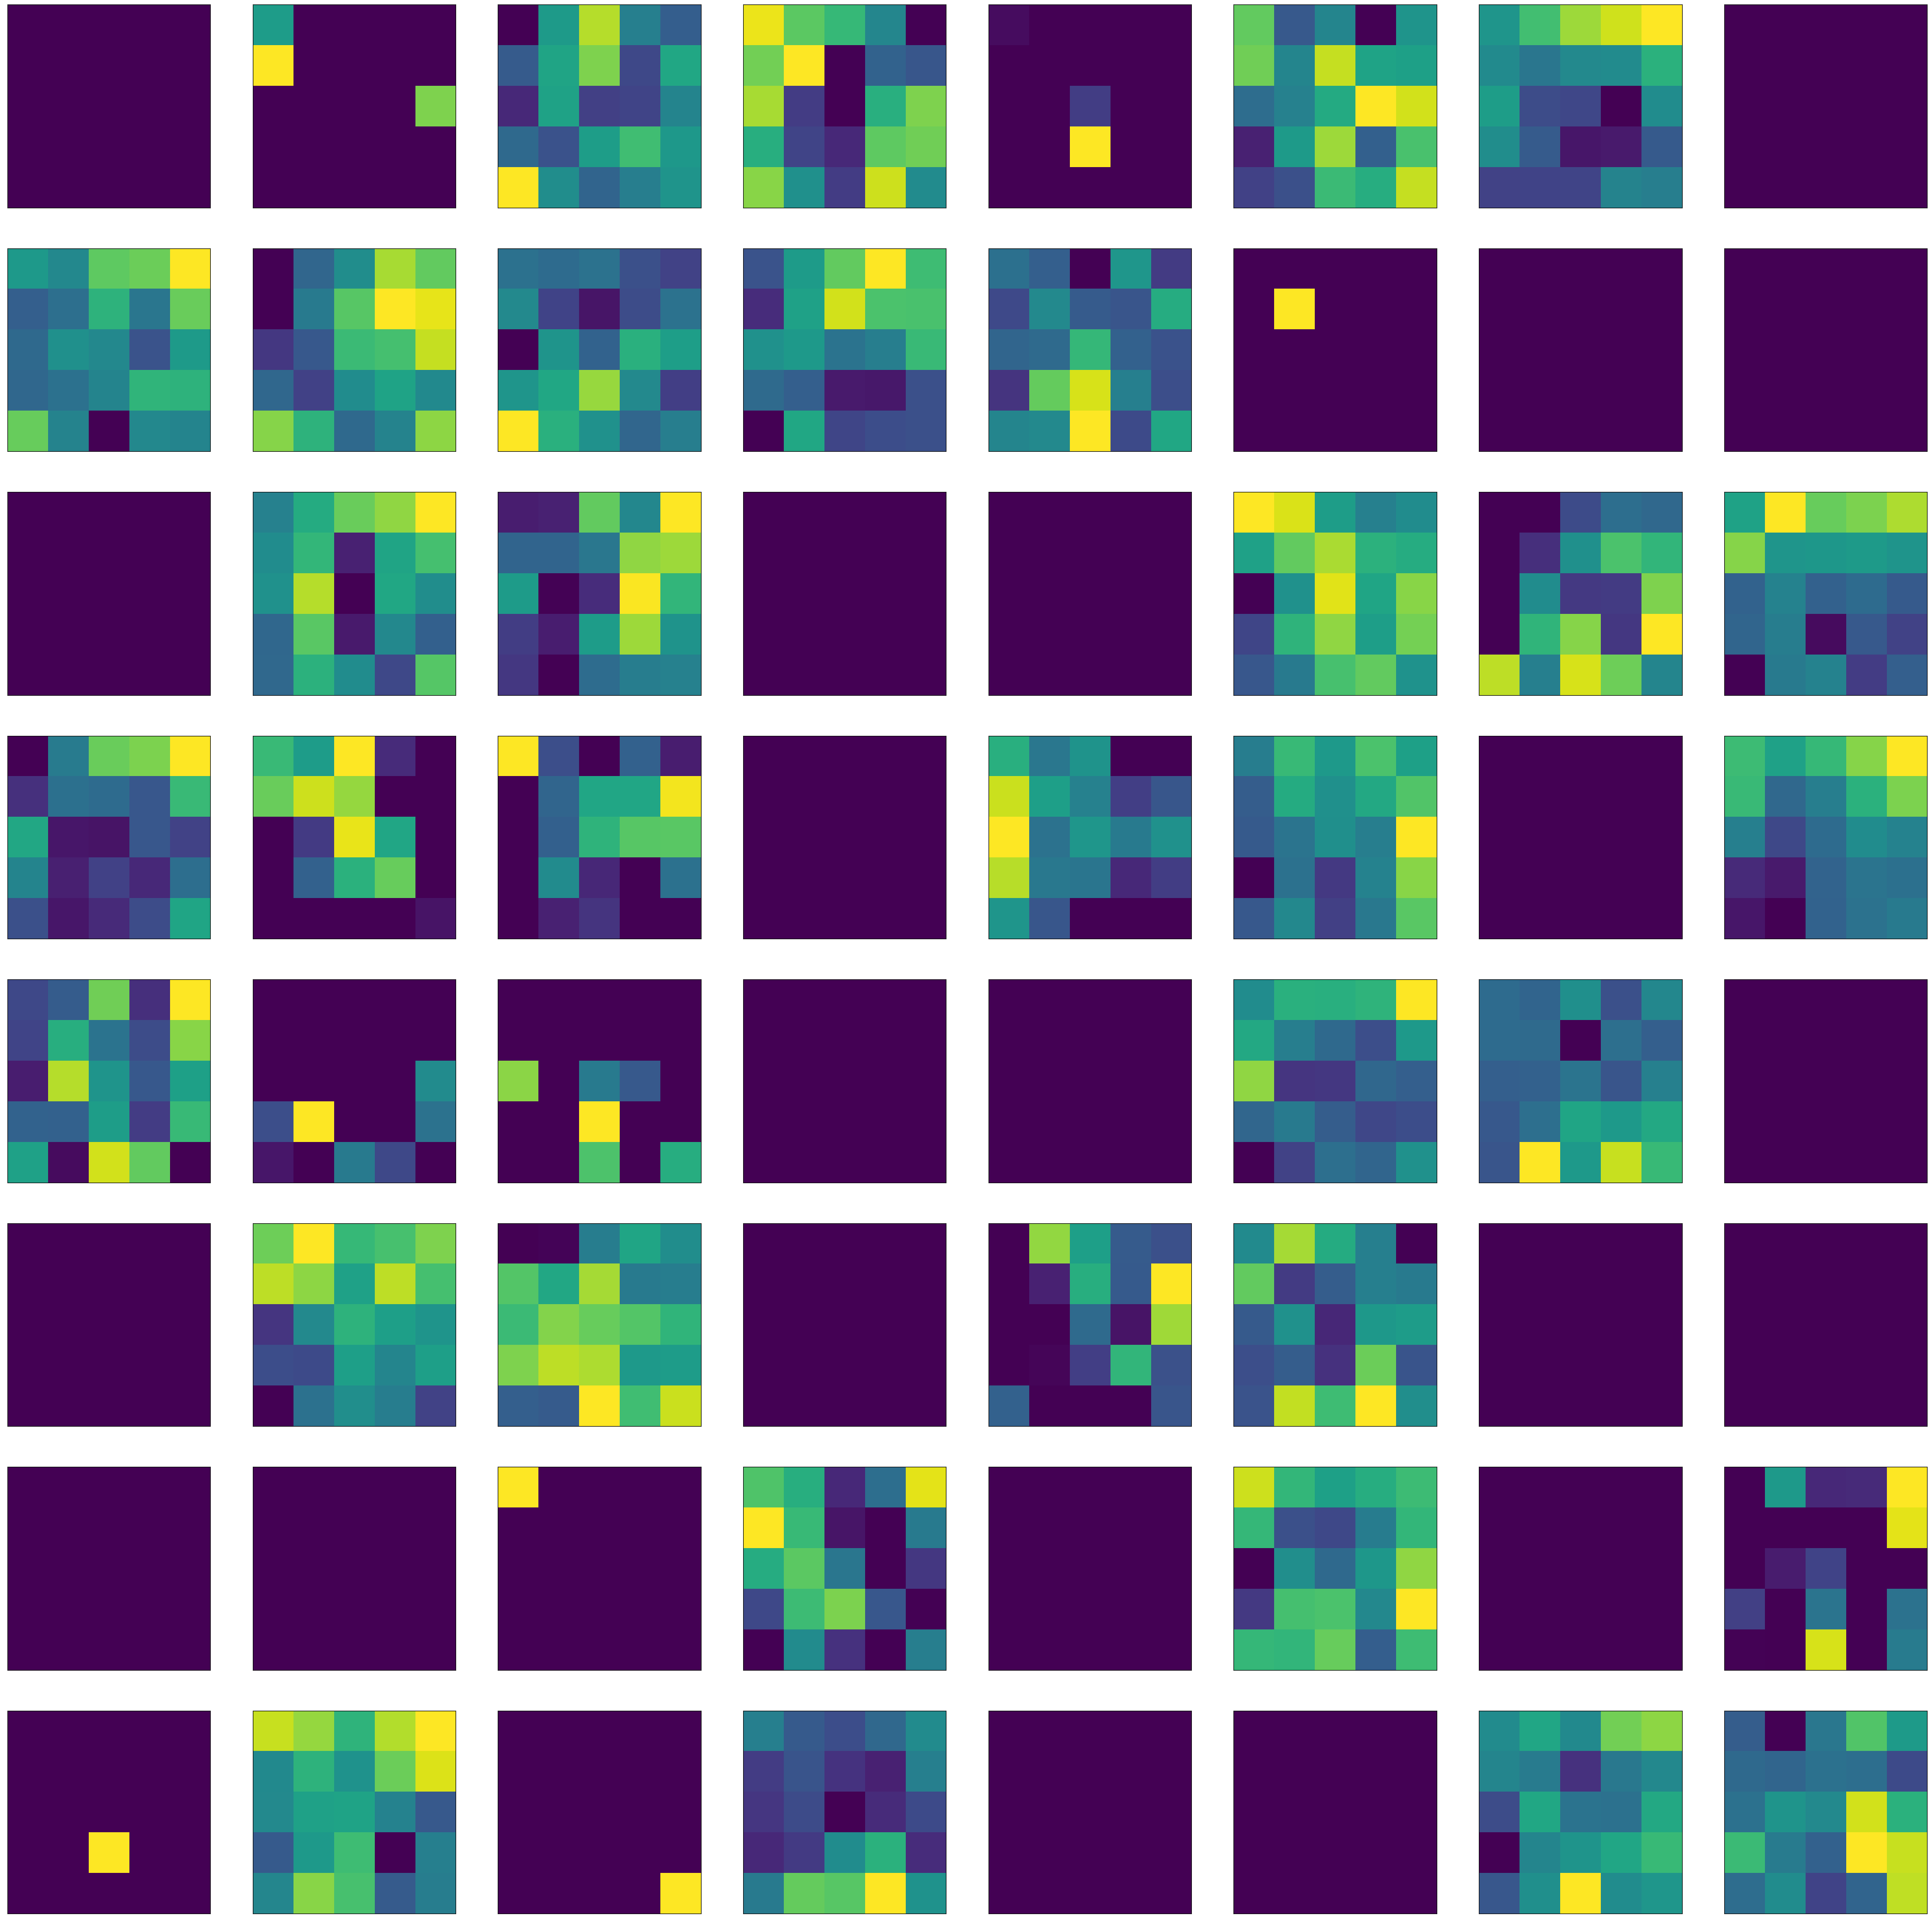

In [22]:
# 여섯 번째 계층에서 특성맵 결과
ins = model.inputs                  # 100,100,3 형태
outs = model.layers[6].output       # 여섯번째 레이어의 출력 => 96,96,32 형태
feature_map = Model(inputs=ins, outputs=outs)
feature_map.summary()

img = cv2.imread("C:/AI/cat.jpg")
img = cv2.resize(img, (100,100))           # 이미지 크기 조정
input_img = np.expand_dims(img, axis=0)    # 차원 확장 (CNN 입력 4차원)

feature = feature_map.predict(input_img)   # 학습되지 않은 신경망을 이용하여 예측

plt.figure(figsize=(50,50))
for i in range(64) :
    plt.subplot(8,8,i+1)
    plt.imshow(feature[0,:,:,i])
    plt.xticks([])
    plt.yticks([])
    
plt.show()